In [1]:
import seaborn as sns
import os
import glob
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# Global plot settings
plt.rcParams.update({
    "font.size": 14,         # increase general font size
    "axes.labelsize": 20,    # axis label font size
    "axes.titlesize": 18,    # title font size
    "xtick.labelsize": 18,   # x tick labels
    "ytick.labelsize": 18,   # y tick labels
    "figure.dpi": 600,       # high-resolution figure
})

In [3]:
def load_decoding_metrics(results_dir):
    """
    Scan `results_dir` for files like:
      sub-13_ses-01_classification_report.csv
    Extract subject/session IDs and load precision, recall, f1 from each file.

    Parameters
    ----------
    results_dir : str
        Path to the folder containing your *_classification_report.csv files.

    Returns
    -------
    List[dict]
        A list of records, each with keys:
        - 'subject_id' : str
        - 'session_id' : str
        - 'precision'  : float
        - 'recall'     : float
        - 'f1'         : float
    """
    pattern = os.path.join(results_dir, "*_classification_report.csv")
    files = glob.glob(pattern)
    records = []

    # Regex to extract subject and session IDs
    # Example filename: sub-13_ses-01_classification_report.csv
    filename_re = re.compile(r"sub-(\d+)_ses-(\d+)_classification_report\.csv")

    for filepath in files:
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            # Skip files that don't match the naming convention
            continue

        subject_id, session_id = m.groups()

        # Read the CSV, assuming the file is a classification report
        df = pd.read_csv(filepath)

        # You need to define this function to extract precision, recall, f1
        # or you can compute average metrics from the report, e.g., weighted average
        p, r, f = get_precision_recall_f1(df)

        records.append({
            "subject_id": subject_id,
            "session_id": session_id,
            "precision": p,
            "recall": r,
            "f1": f
        })

    return records

# Dummy example of get_precision_recall_f1 function
def get_precision_recall_f1(df):
    """
    Assuming df is a classification report with rows for each class,
    and columns like 'precision', 'recall', 'f1-score', and a row 'weighted avg'.

    This function extracts the weighted average precision, recall, f1.

    Modify this depending on your CSV structure.
    """
    try:
        weighted = df[df['class'] == 'weighted avg'].iloc[0]
        p = float(weighted['precision'])
        r = float(weighted['recall'])
        f = float(weighted['f1-score'])
    except Exception:
        # fallback to mean of all classes except totals
        p = df['precision'].mean()
        r = df['recall'].mean()
        f = df['f1-score'].mean()
    return p, r, f


# Example usage:
results = load_decoding_metrics("results/DecodingResults")
for rec in results:
    print(f"Sub {rec['subject_id']} | Ses {rec['session_id']} → "
          f"Precision={rec['precision']:.3f}, Recall={rec['recall']:.3f}, F1={rec['f1']:.3f}")


Sub 05 | Ses 02 → Precision=0.800, Recall=0.797, F1=0.791
Sub 11 | Ses 01 → Precision=0.705, Recall=0.709, F1=0.702
Sub 08 | Ses 01 → Precision=0.878, Recall=0.876, F1=0.876
Sub 05 | Ses 01 → Precision=0.739, Recall=0.739, F1=0.737
Sub 10 | Ses 01 → Precision=0.672, Recall=0.647, F1=0.633
Sub 13 | Ses 01 → Precision=0.797, Recall=0.784, F1=0.780
Sub 15 | Ses 02 → Precision=0.925, Recall=0.924, F1=0.923
Sub 12 | Ses 02 → Precision=0.748, Recall=0.748, F1=0.742
Sub 14 | Ses 01 → Precision=0.773, Recall=0.761, F1=0.753
Sub 06 | Ses 01 → Precision=0.757, Recall=0.725, F1=0.719
Sub 09 | Ses 02 → Precision=0.882, Recall=0.876, F1=0.874
Sub 07 | Ses 01 → Precision=0.653, Recall=0.647, F1=0.641
Sub 04 | Ses 02 → Precision=0.746, Recall=0.634, F1=0.621
Sub 09 | Ses 01 → Precision=0.831, Recall=0.824, F1=0.825
Sub 12 | Ses 01 → Precision=0.776, Recall=0.755, F1=0.745
Sub 01 | Ses 01 → Precision=0.666, Recall=0.621, F1=0.597
Sub 15 | Ses 01 → Precision=0.810, Recall=0.765, F1=0.765
Sub 02 | Ses 0

In [4]:
df = pd.DataFrame(results)
df

,subject_id,session_id,precision,recall,f1
0,05,02,0.800408,0.797386,0.791048
1,11,01,0.705441,0.709150,0.701799
2,08,01,0.878213,0.875817,0.875752
3,05,01,0.738903,0.738562,0.736747
4,10,01,0.671622,0.647059,0.633043
5,13,01,0.797040,0.784314,0.780159
6,15,02,0.924667,0.924208,0.923112
7,12,02,0.748196,0.748366,0.742259
8,14,01,0.772840,0.761438,0.753388
9,06,01,0.756898,0.725490,0.719272


In [5]:
df.groupby('subject_id')[['precision', 'recall', 'f1']].mean().reset_index()

,subject_id,precision,recall,f1
0,01,0.665934,0.620915,0.597036
1,02,0.665455,0.571895,0.549990
2,03,0.827381,0.807190,0.803830
3,04,0.810195,0.748366,0.740623
4,05,0.769655,0.767974,0.763898
5,06,0.737846,0.707516,0.706578
6,07,0.653462,0.647059,0.641367
7,08,0.878213,0.875817,0.875752
8,09,0.856290,0.849673,0.849820
9,10,0.671622,0.647059,0.633043


In [6]:

def plot_metrics_per_subject(records):
    """
    Plot average precision, recall, and F1 score per subject with enhanced aesthetics.

    Parameters
    ----------
    records : List[dict]
        Each dict must have keys:
        - 'subject_id' : str
        - 'precision'  : float
        - 'recall'     : float
        - 'f1'         : float
    """

    from collections import defaultdict

    # Aggregate metrics by subject
    metrics_by_subject = defaultdict(lambda: {'precision': [], 'recall': [], 'f1': []})
    for rec in records:
        sid = rec['subject_id']
        metrics_by_subject[sid]['precision'].append(rec['precision'])
        metrics_by_subject[sid]['recall'].append(rec['recall'])
        metrics_by_subject[sid]['f1'].append(rec['f1'])

    # Compute average metrics per subject
    subjects = sorted(metrics_by_subject.keys(), key=lambda x: int(x))
    precision_avg = [np.mean(metrics_by_subject[s]['precision']) for s in subjects]
    recall_avg = [np.mean(metrics_by_subject[s]['recall']) for s in subjects]
    f1_avg = [np.mean(metrics_by_subject[s]['f1']) for s in subjects]

    # Plot settings
    x = np.arange(len(subjects))
    width = 0.25
    fig, ax = plt.subplots(figsize=(16, 8))

    # Use visually distinct colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

    bars1 = ax.bar(x - width, precision_avg, width, label='Precision', color=colors[0], edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x, recall_avg, width, label='Recall', color=colors[1], edgecolor='black', linewidth=1.2)
    bars3 = ax.bar(x + width, f1_avg, width, label='F1 Score', color=colors[2], edgecolor='black', linewidth=1.2)

    # Labels, bold fonts, and limits
    ax.set_xticks(x)
    ax.set_xticklabels(subjects, fontsize=16, fontweight='bold')
    ax.set_xlabel('Subject ID', fontsize=20, fontweight='bold', labelpad=12)
    ax.set_ylabel('Score', fontsize=20, fontweight='bold', labelpad=12)
    ax.set_ylim(0, 1)

    # Annotate bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.01,
                f"{height:.2f}",
                ha='center',
                va='bottom',
                fontsize=14,
                fontweight='bold',
                rotation=90
            )

    # Legend
    ax.legend(fontsize=16)

    # Clean spines and grid
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)
    ax.set_yticks(np.round(ax.get_yticks(), 2))
    ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.savefig('results/images/overt_covert_rest_metrics.png', dpi=800)
    plt.show()


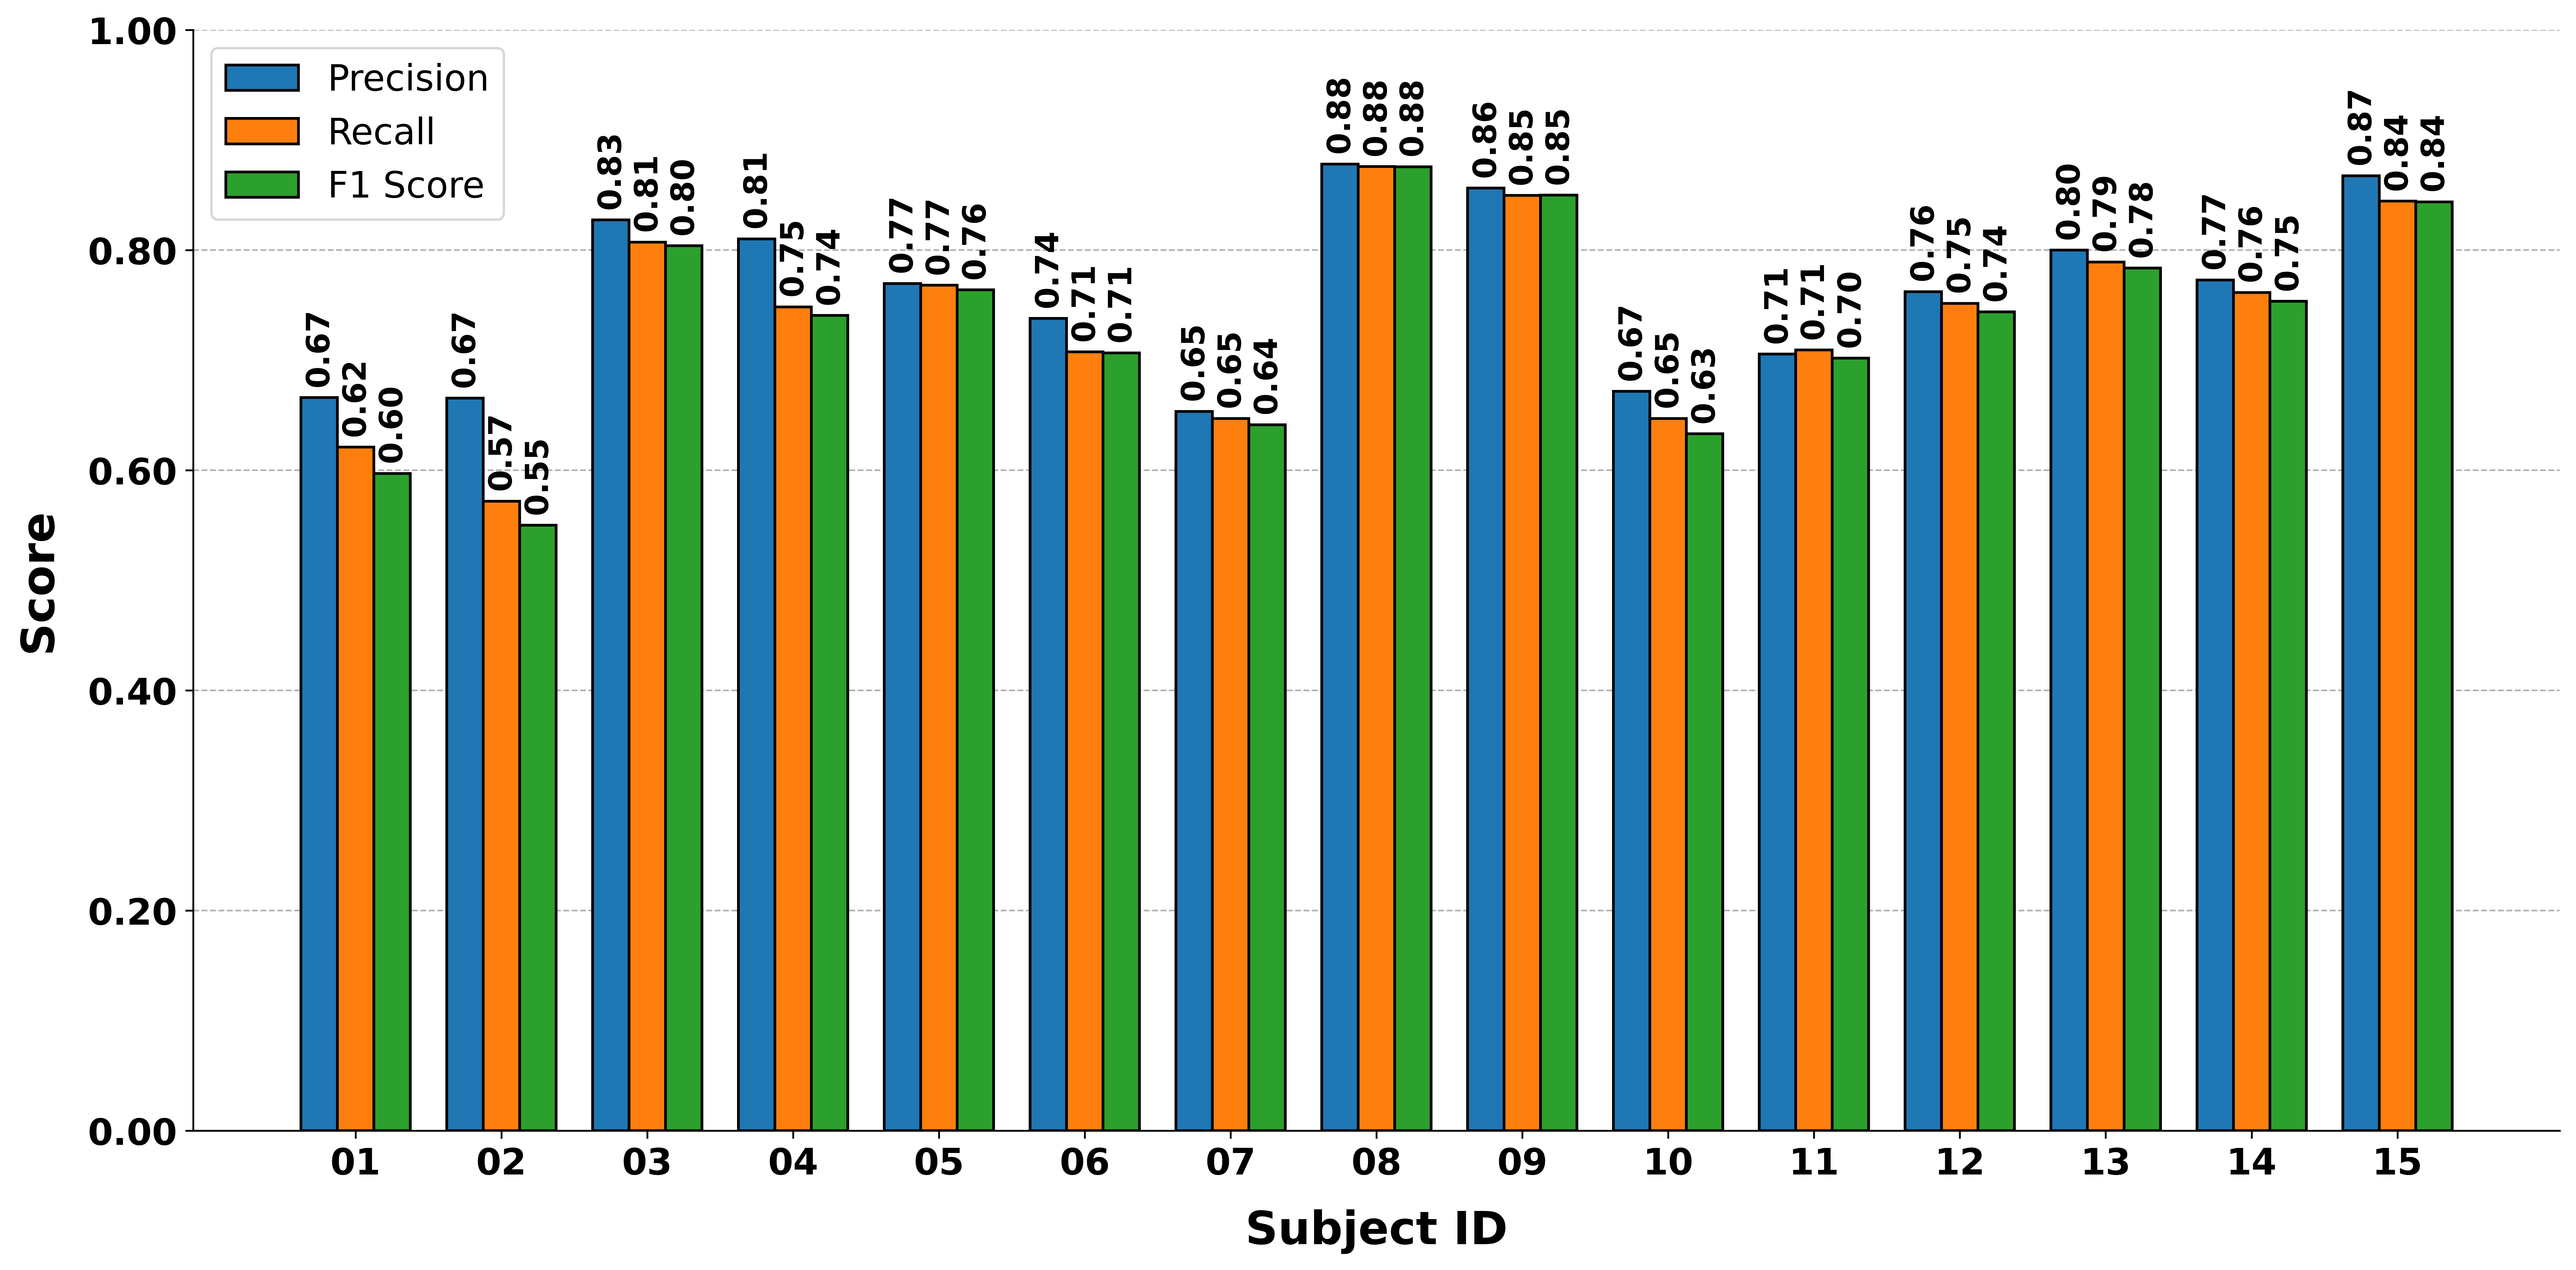

In [7]:
plot_metrics_per_subject(results)